In [36]:
import argparse
import torch
import numpy as np
import torchvision
from torch import nn, optim
import torchvision.transforms as transforms
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

# Gathers the meta data for the images of ALEX SET
paths_test = []
ROOT_DIR1 = "/Users/PG/Documents/AI/CW1/scripts_q2/alexset_images/"
for entry in os.scandir(ROOT_DIR1):
    if (entry.is_file()):
        paths_test.append(entry.path)
            
data_test = {
    'path': paths_test
}

data_df_test = pd.DataFrame(data_test, columns=['path'])
#data_df_test = data_df_test.sample(frac=1).reset_index(drop=True) # Shuffles the data

print("Found", len(data_df_test), "images.")
print(data_df_test.head())


data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(256),
        #transforms.ColorJitter(hue=0.2, saturation=0.2, brightness=0.2),            # added optimization
        #transforms.RandomHorizontalFlip(p=0.5),                                     # added optimization
        #transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9,1.1)),
        transforms.ToTensor(),
        transforms.Normalize(NORM_MEAN, NORM_STD)       
    ])

dataset_alex = ImageNet10(
    df=data_df_test,
    transform=data_transform,
)

test_loader = torch.utils.data.DataLoader(
    dataset_alex,
    batch_size=1,
    shuffle=False,
    num_workers=2
)

# See what you've loaded
print("len(test_loader)",len(test_loader))

Found 1 images.
                                                path
0  /Users/PG/Documents/AI/CW1/scripts_q2/alexset_...
len(test_loader) 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


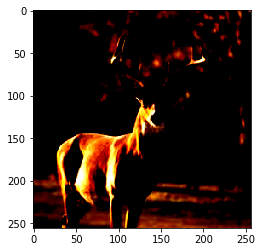

torch.Size([1, 3, 256, 256])
<class 'torch.Tensor'>


In [37]:
def timshow(x):
    xa = np.transpose(x.numpy(),(1,2,0))
    plt.imshow(xa)
    plt.show()
    return xa
    
# get some random training images
dataiter = iter(test_loader)
images = dataiter.next()

# show images and labels
timshow(torchvision.utils.make_grid(images))
print(images.shape)
print(type(images))

In [130]:
import argparse
import torch
import numpy as np
import torchvision
from torch import nn, optim
import torchvision.transforms as transforms
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
%matplotlib inline

image_x_path="/Users/PG/Documents/AI/CW1/colab/alexset_images/image3.jpg"

(225, 225, 3)


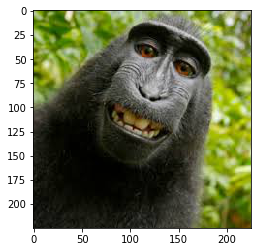

In [131]:
im = plt.imread('image3.jpg')
print(im.shape)
plt.imshow(im)

In [132]:
image_x = Image.open(image_x_path)
# Normalizations expected by pre-trained net, to apply in the image transform
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]
transform_image = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(norm_mean, norm_std)
    ])

#apply image transformation to image_x
image_x = image_x.convert('RGB')
image_x = transform_image(image_x) 
image_x = image_x.unsqueeze(0)
print(image_x)

tensor([[[[ 0.1254,  0.1426, -0.3027,  ..., -0.3712, -0.2342,  0.0227],
          [ 0.1939,  0.1939, -0.1828,  ..., -0.2856, -0.1143,  0.1083],
          [-0.0287, -0.0458, -0.3198,  ..., -0.1486,  0.0398,  0.2111],
          ...,
          [-1.7754, -1.7583, -1.7412,  ..., -0.8335, -0.8507, -0.8507],
          [-1.7754, -1.7583, -1.7412,  ..., -0.7993, -0.8164, -0.8164],
          [-1.7583, -1.7412, -1.7412,  ..., -0.7308, -0.7479, -0.7822]],

         [[ 0.8354,  0.8354,  0.6254,  ...,  0.1702,  0.2927,  0.4853],
          [ 0.9230,  0.9230,  0.7829,  ...,  0.2927,  0.4153,  0.5903],
          [ 0.9055,  0.8880,  0.6779,  ...,  0.3627,  0.5203,  0.6779],
          ...,
          [-1.6681, -1.6506, -1.6331,  ..., -0.8627, -0.8102, -0.7402],
          [-1.6681, -1.6506, -1.6331,  ..., -0.8803, -0.8452, -0.7752],
          [-1.6506, -1.6331, -1.6331,  ..., -0.9153, -0.8803, -0.8102]],

         [[-1.8044, -1.8044, -1.5779,  ..., -1.2990, -0.9853, -0.4450],
          [-1.8044, -1.8044, -

In [3]:
# Loads the model and downloads pre-trained weights if not already downloaded
model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

# To see the AlexNet architecture
print(model)

model.eval()

Using cache found in C:\Users\PG/.cache\torch\hub\pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [133]:
def image_forward_pass(model):
    with torch.no_grad():
        outputs = model(image_x)
        _, predicted = torch.max(outputs.data, 1)
    return predicted

#call imgage_forward_pass function
image_x_fp = image_forward_pass(model)
print(image_x_fp)

tensor([366])


In [134]:
# layer indices of each conv layer in AlexNet
conv_layer_indices = [0, 3, 6, 8, 10]

#########################################################################
#
#        QUESTION 2.1.3 
# 
#########################################################################

def extract_filter(conv_layer_idx, model):
        # Extracts a single filter from the specified convolutional layer,
		# zero-indexed where 0 indicates the first conv layer.
 
		# Args:
			# conv_layer_idx (int): index of convolutional layer
			# model (nn.Module): PyTorch model to extract from
	# Extract filter
    the_filter = model.features[conv_layer_idx].weight.data
    return the_filter

#loop convolutional layers indices or pass specific index in extract filter function  
for ind in conv_layer_indices:
    f_weights = extract_filter(ind,model)
    #print("Filters_all:", f_weights)
    print("Filters_all_shape:", f_weights.shape)

Filters_all_shape: torch.Size([64, 3, 11, 11])
Filters_all_shape: torch.Size([192, 64, 5, 5])
Filters_all_shape: torch.Size([384, 192, 3, 3])
Filters_all_shape: torch.Size([256, 384, 3, 3])
Filters_all_shape: torch.Size([256, 256, 3, 3])


In [135]:
def extract_feature_maps_all(input, model):
	# Extract all feature maps
	# Hint: use conv_layer_indices to access
    #get indices after conv+relu activation as per question asked
    conv_relu_activation=[1,4,7,9,11]
    image_x = input
    feature_maps = []
    features = model.features
    with torch.no_grad():
        for index,layer in enumerate(features):
            image_x = layer(image_x)
            if index in conv_relu_activation:
                feature_maps.append(image_x)
    return feature_maps
feature_map_all = extract_feature_maps_all(image_x, model)
#print("feature_maps_all:", feature_map_all)
print("feature_map_layers:", len(feature_map_all))

feature_map_layers: 5


In [ ]:
***VISUALIZATION CODE***

In [149]:
def extract_feature_maps_specific_layer(input, model,specific_index):
    image_x = input
    features = model.features
    with torch.no_grad():
        for index,layer in enumerate(features):
            image_x = layer(image_x)
            if specific_index == index:
                return image_x

#specific_layer_index = 0
single_feature_map = extract_feature_maps_specific_layer(image_x, model, 11)
#print("single map:", single_feature_map)

In [151]:
#plot filters
def visualize_filter(filter_weight_specific_index):
    plt.figure(figsize=(20, 17))
    for i, filter in enumerate(filter_weight_specific_index):
        plt.subplot(20, 20, i+1) # (8, 8) because in conv0 we have 11x11 filters and total of 64 (see printed shapes)
        plt.imshow(filter[0, :, :].detach(), cmap='PuBu')
        plt.axis('off')
    plt.show()

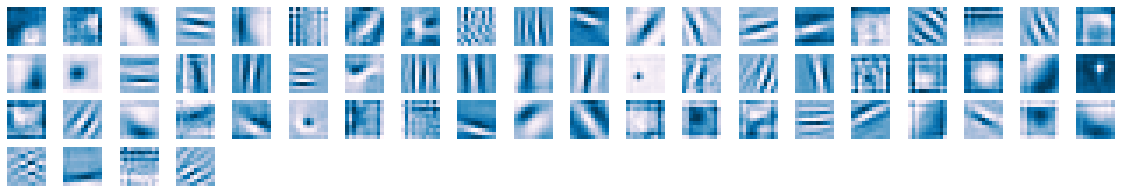

In [152]:
#invoke the extract filter function and visualize_filter function
filter_weight_specific_index =extract_filter(0,model)
#print("single filter:",filter_weight_specific_index)
visualize_filter(filter_weight_specific_index)

In [156]:
#plot feature map
def visualize_feature_map(f_map):
    f_map = f_map.squeeze(0)
    f_map = f_map.numpy()
    f_map_num = f_map.shape[0]
    row_num = np.ceil(np.sqrt(f_map_num))
    plt.figure(figsize=(20, 17))
    for index in range(1, f_map_num+1):
        plt.subplot(8, 8, index)
        plt.imshow(f_map[index-1], cmap='PuBu')
        plt.axis('off')
        #if(index==16):
            #break
plt.show()

ValueError: num must be 1 <= num <= 64, not 65

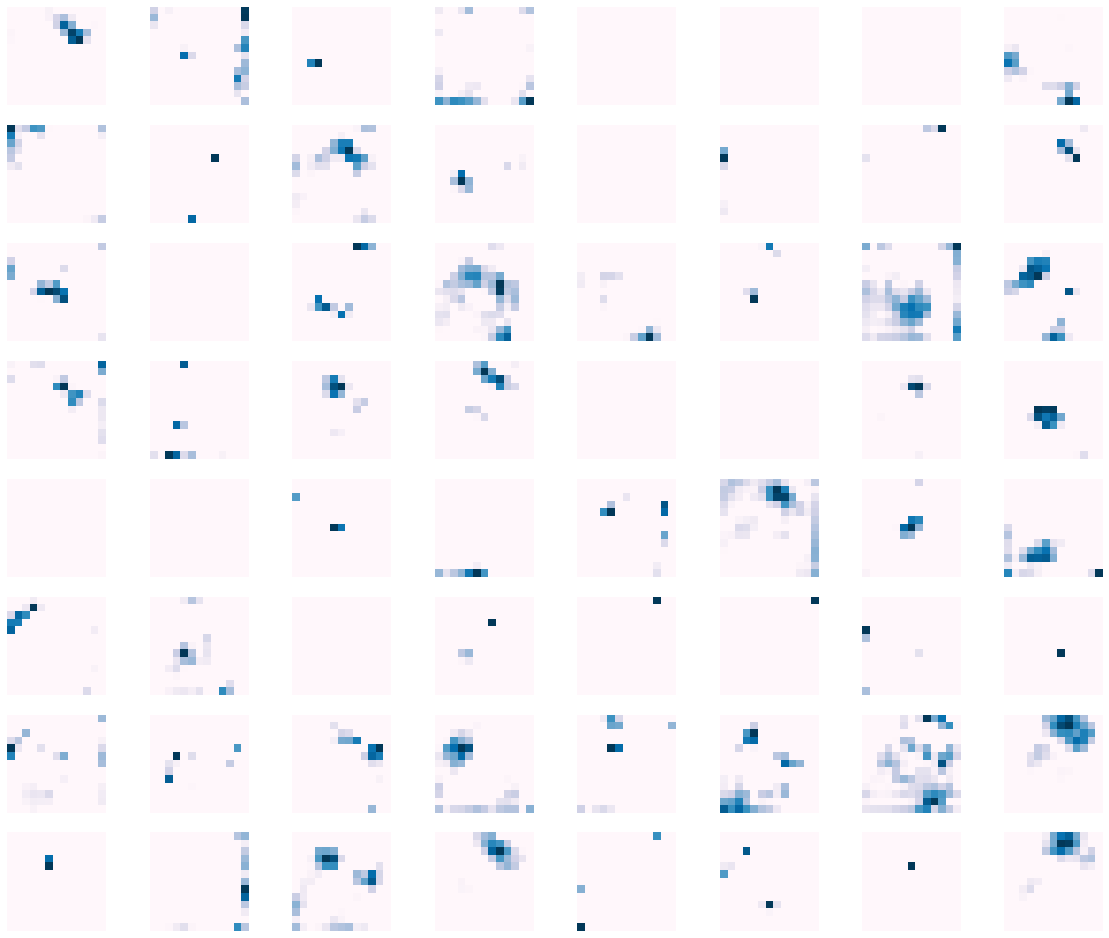

In [157]:
visualize_feature_map(single_feature_map)

In [5]:
def stats(loader, net):
    with torch.no_grad():
        for data in loader:
            images = data
            outputs = model(images)               # uses net2 model designed for complete train set
            _, predicted = torch.max(outputs.data, 1)
            print("predicted:",predicted)
    return "Done"

In [6]:
result=stats(test_loader,model)
print(result)

predicted: tensor([172, 259, 367, 351])
Done


In [ ]:
#model.features[3].weight.data

In [7]:
def extract_filter(conv_layer_idx, model):
    the_filter=model.features[conv_layer_idx].weight.data
    return the_filter
        

In [15]:
conv_layer_indices = [0, 3, 6, 8, 10]
filter_weights=extract_filter(0,model)
#print(filter_weights)

In [ ]:
print("Model's state_dict:")
hh=0
for param_tensor in model.state_dict():
    print("hello----",param_tensor, "\t", model.state_dict()[param_tensor])
    if(hh==0):
        weight0=model.state_dict().get("features.0.weight")
    hh=hh+1

In [ ]:
pre_dict = model.features[0].state_dict() 
print((k,v) for k ,v in pre_dict.items())
for k ,v in pre_dict.items():
    print(k,len(v),v.shape[])

In [66]:
# 获取第k层的特征图
def get_k_layer_feature_map(feature_extractor, k, x):
    print(feature_extractor)
    with torch.no_grad():
        for index,layer in enumerate(feature_extractor):
            x = layer(x)
            print(x.shape)
            if k == index:
                return x



In [67]:
#  可视化特征图
def show_feature_map(feature_map):
    #print(feature_map.shape)
    feature_map = feature_map.squeeze(0)
    feature_map = feature_map.cpu().numpy()
    feature_map_num = feature_map.shape[0]
    row_num = np.ceil(np.sqrt(feature_map_num))
    plt.figure(figsize=(20,17))
    for index in range(1, feature_map_num+1):
        plt.subplot(row_num, row_num, index)
        plt.imshow(feature_map[index-1], cmap='gray')
        plt.axis('off')
        #scipy.misc.imsave(str(index)+".png", feature_map[index-1])
    plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)
torch.Size([1, 64, 63, 63])
torch.Size([1, 64, 63, 63])
torch.Size([1, 64, 31, 31])


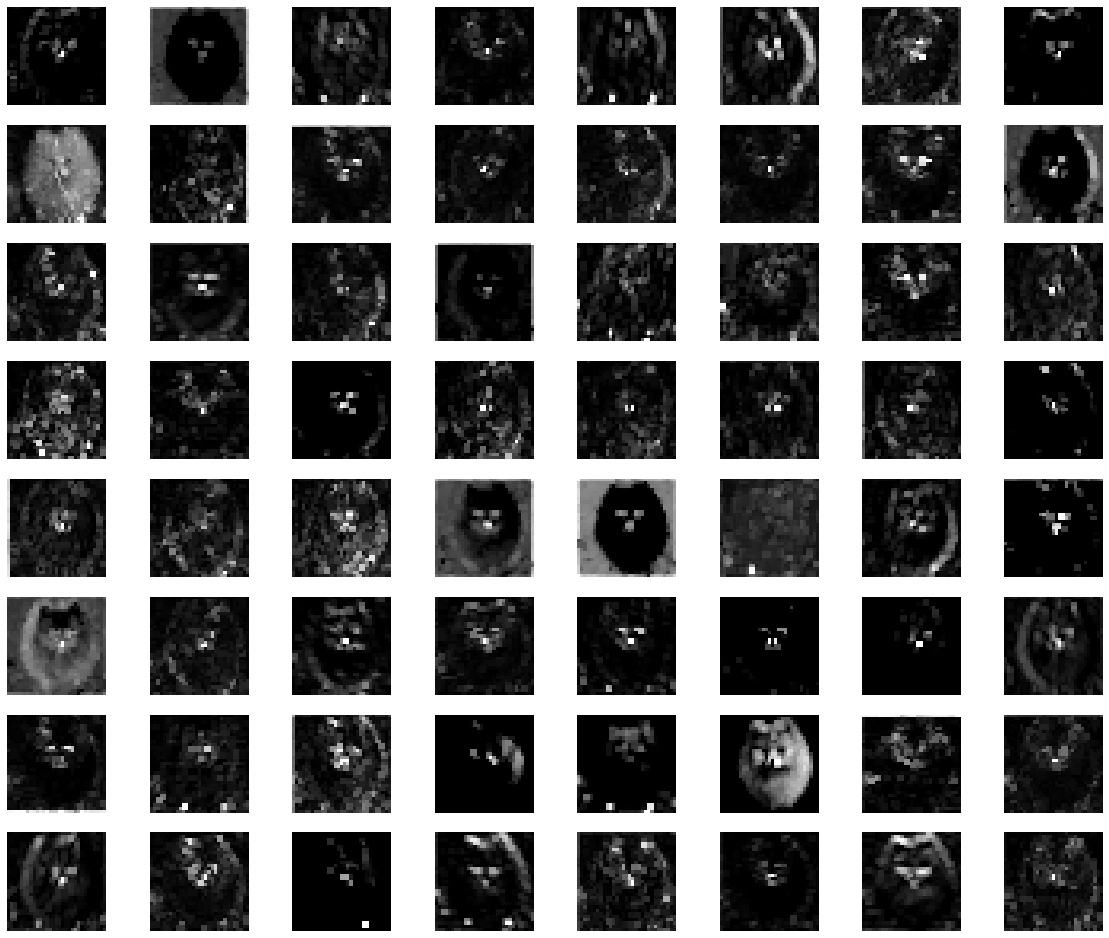

In [71]:
    k = 2
    # alexnet只有features部分有特征图
    # classifier部分的feature map是向量
    feature_extractor = model.features
    for index,layer in enumerate(feature_extractor):
            #x = layer(x)
        print(index)
            #if k == index:
                #return x
    feature_map = get_k_layer_feature_map(feature_extractor, k, image_info)
    show_feature_map(feature_map)

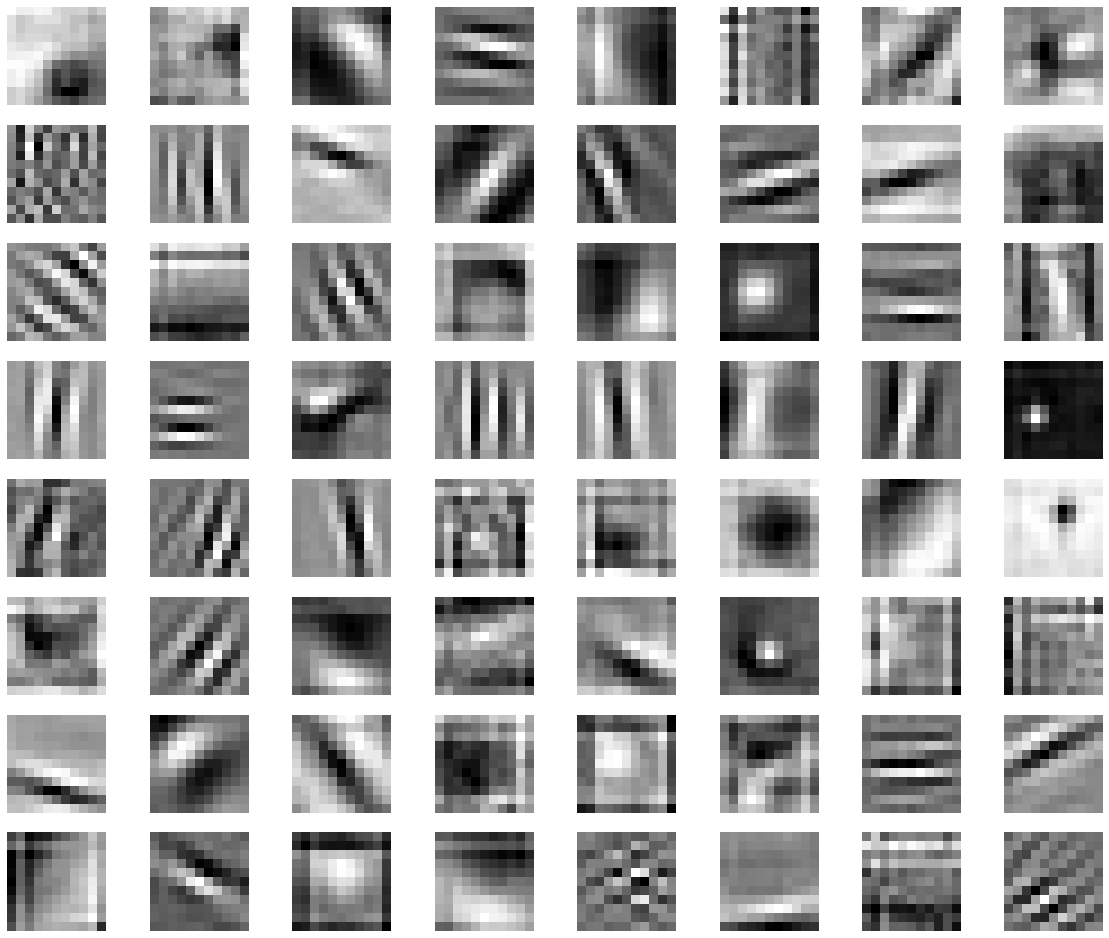

In [45]:
plt.figure(figsize=(20,17))
for i, filter in enumerate(model.features[0].weight.data):
    plt.subplot(8, 8, i+1) # (8, 8) because in conv0 we have 7x7 filters and total of 64 (see printed shapes)
    plt.imshow(filter[0, :, :].detach(), cmap='gray')
    plt.axis('off')
plt.show()